Подключение библиотек

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Загрузка данных

In [2]:
data_path = "C:\\Users\\sevab\\heart.csv"
data = pd.read_csv(data_path)
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Количественные признаки
Применение pandas для визуализации данных

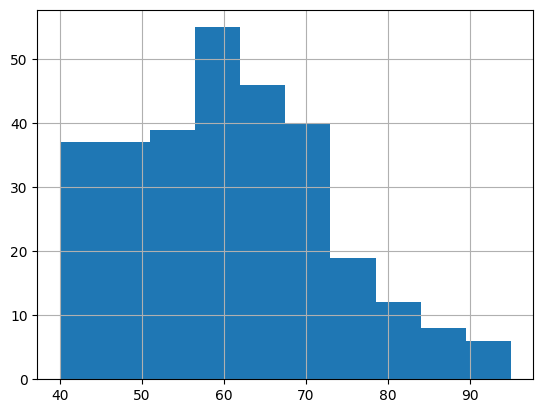

In [4]:
data['age'].hist();

использование Seaborn
# Построение диаграммы типа "ящик с усами"
1. Медиана: Это значение, которое делит набор данных на две равные части. В случае нечетного количества наблюдений медиана — это среднее значение, а в случае четного — среднее двух центральных значений. На диаграмме "ящик с усами" медиана обычно обозначается линией внутри ящика.

2. Квартиль: Это значения, которые делят набор данных на четыре равные части. 

   • Первый квартиль (Q1) — это медиана первой половины данных (25% данных ниже этого значения).

   • Второй квартиль (Q2) — это медиана всего набора данных (50% данных ниже этого значения).

   • Третий квартиль (Q3) — это медиана второй половины данных (75% данных ниже этого значения).

3. Интерквартильный размах (IQR): Это разница между третьим и первым квартилями (IQR = Q3 - Q1). Этот показатель показывает разброс средних 50% данных и используется для определения выбросов.

4. Выбросы: Это значения, которые значительно отличаются от других значений в наборе данных. В диаграмме "ящик с усами" выбросы обычно обозначаются отдельными точками, которые находятся за пределами "усов". Усы часто простираются до 1.5 * IQR от первого и третьего квартилей, и любые данные за пределами этого диапазона считаются выбросами.

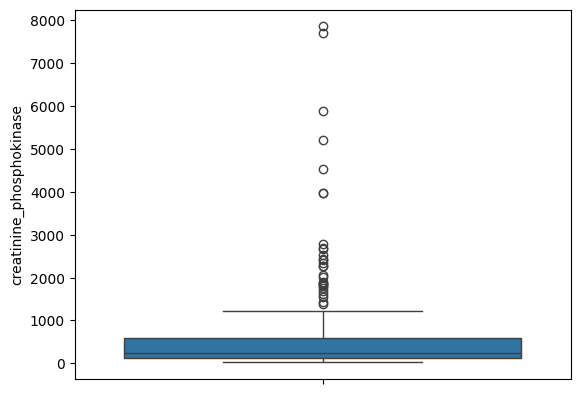

In [37]:
sns.boxplot(data['creatinine_phosphokinase']);
#креатинин фосфокиназа - это фермент, который присутствует в различных тканях организма

C:\Users\sevab\AppData\Local\Temp\ipykernel_4184\382878890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='diabetes',


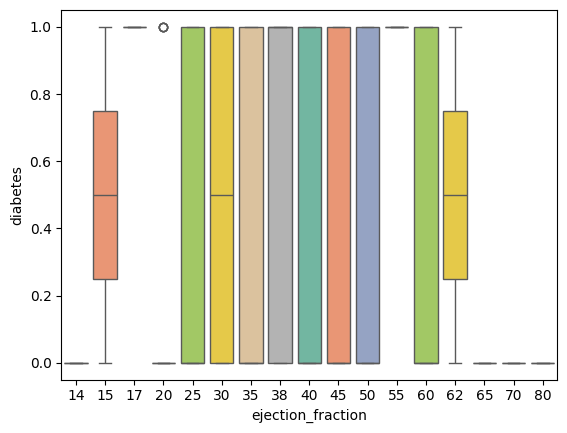

In [38]:
top_data = data[['diabetes','ejection_fraction']]
top_data = top_data.groupby('diabetes').sum()
top_data = top_data.sort_values('ejection_fraction',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='diabetes', 
            x='ejection_fraction', 
            data=data[data.diabetes.isin(top_data)], palette='Set2');

Использование boxplot для анализа признака для диабета

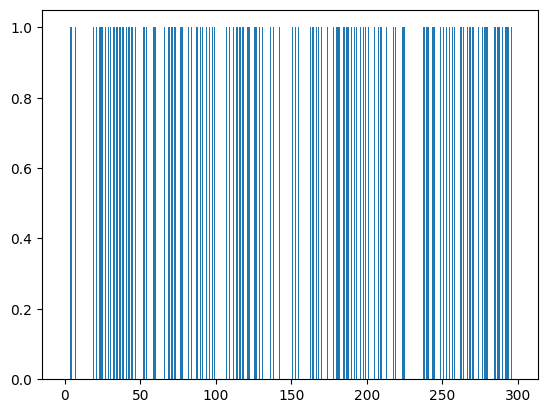

In [39]:
plt.bar(data.index, data['diabetes']) #Здесь создаётся столбчатая диаграмма (bar chart).
plt.show()

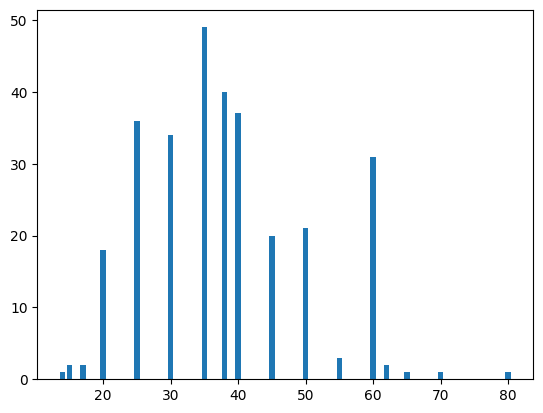

In [40]:
hist = data['ejection_fraction'].value_counts() #Здесь создаётся объект hist, который содержит количество уникальных значений в столбце 'ejection_fraction'
                                                #Метод value_counts() подсчитывает количество вхождений каждого уникального значения в указанном столбце.
plt.bar(hist.index, hist); # В этой строке снова создаётся столбчатая диаграмма.

Визуализация соотношения количественных признаков.
Одним из вариантов визуализации соотношения количественных признаков является диаграмма по нескольким признакам 

Все показатели, содержащие подстроку «serum» в имени показателя. 
На рисунке представлен код для отбора требуемых показателей. 
 Диаграммы для сравнения распределения числовых 
показателей


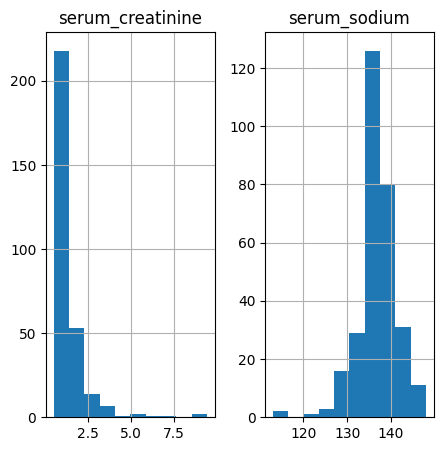

In [41]:
feats=[f for f in data.columns if 'serum' in f]
feats
['serum_creatinine',
 'serum_sodium']
data[feats].hist(figsize=(5,5));

Попарное сравнение признаков для обеспечения 
широкого взгляда на набор данных 

Она создаёт график, состоящий из нескольких подграфиков, где каждый подграфик отображает распределение двух признаков.

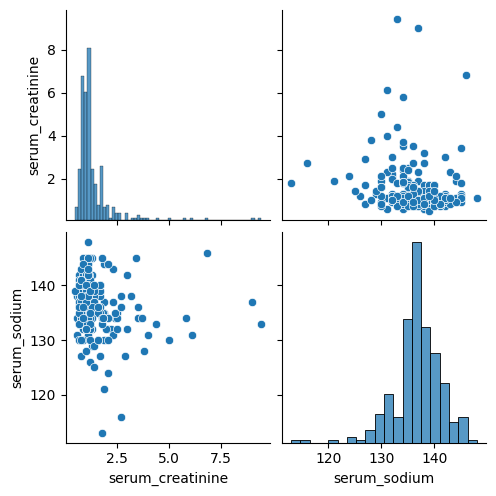

In [42]:
sns.pairplot(data[feats]); #использует библиотеку Seaborn для создания матрицы парных графиков (pair plot) для набора данных, содержащего определённые признаки (features).

Можно строить более сложные попарные распределения признаков (с добавлением признаков и раскраской)

До 
сих пор использовались возможности библиотеки seaborn, а также 
методы pandas (которые производят визуализацию, оращаясь к библиотеке 
matplotlib). 

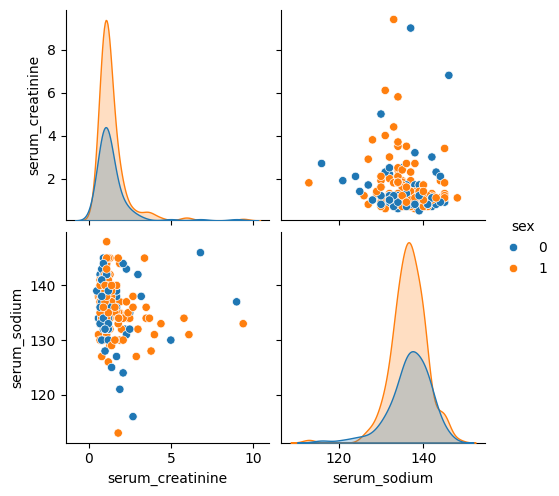

In [43]:
sns.pairplot(data[feats + ['sex']], hue='sex');

показан 
пример 
использования 
графика 
библиотеки matplotlib, предназначенного для вывода множества точек.
 scatter 


Настройка графика: цвет точки зависит от целевого 
значения признака

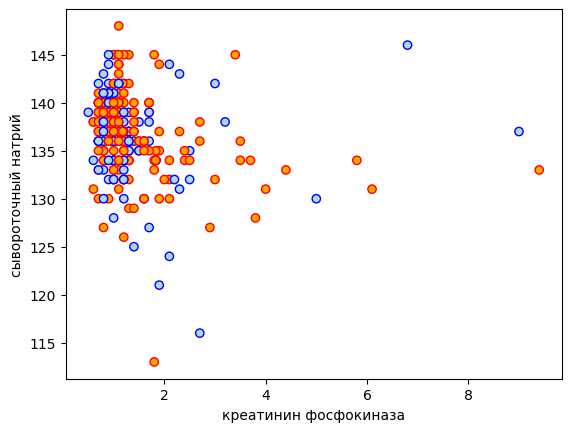

In [44]:
# Раскрашивание данных
# Цвет в зависимости от занятия или нет сексом
c = data['sex'].map({0: 'lightblue', 1: 'orange'})
edge_c = data['sex'].map({0: 'blue', 1: 'red'})
# Настройка графика
plt.scatter(data['serum_creatinine'], data['serum_sodium'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('креатинин фосфокиназа')
plt.ylabel('сывороточный натрий');

График на рисунке можно построить различными способами, 
например, можно добавлять множества точек отдельными подмножествами, 
указывая параметры визуализации для каждого подмножества 

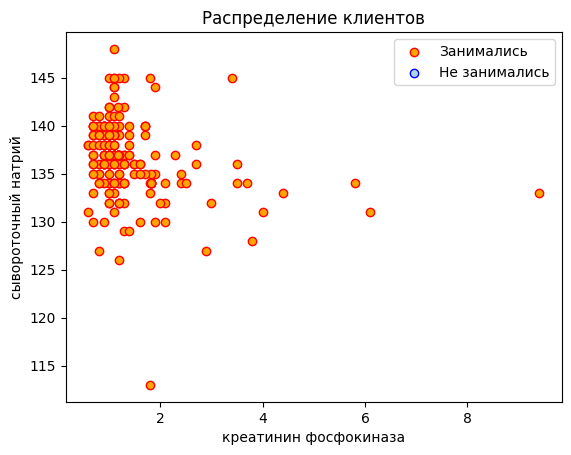

In [45]:
# Раскраска пациентов занимавшихся сексом или нет,
# добавление легенды

# Занимавшиеся клиенты
data_churn = data[data['sex']==1]
# Не занимавшиеся клиенты
data_loyal = data[~data['sex']==0]

plt.scatter(data_churn['serum_creatinine'], #Ссодержит только те строки из исходного data, где значение в столбце 'sex' истинно (True).
            data_churn['serum_sodium'],
            color='orange',
            edgecolors='red',
            label='Занимались'
           )
plt.scatter(data_loyal['serum_creatinine'], #ложно (False)
            data_loyal['serum_sodium'],
            color='lightblue',
            edgecolors='blue',
            label='Не занимались'
           )
plt.xlabel('креатинин фосфокиназа')
plt.ylabel('сывороточный натрий')
plt.title('Распределение клиентов')
plt.legend();

Корреляция признаков

Корреляция признаков в обучающей выборке — это мера того, насколько сильно связаны между собой различные признаки (или переменные) в вашем наборе данных. Корреляция показывает, как изменение одного признака связано с изменением другого.

В 
пакете Pandas имеется встроенный инструмент для этого — метод согг() 

In [46]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


проанализировать корреляцию Нолучше использовать специальный тип графика — heatmap

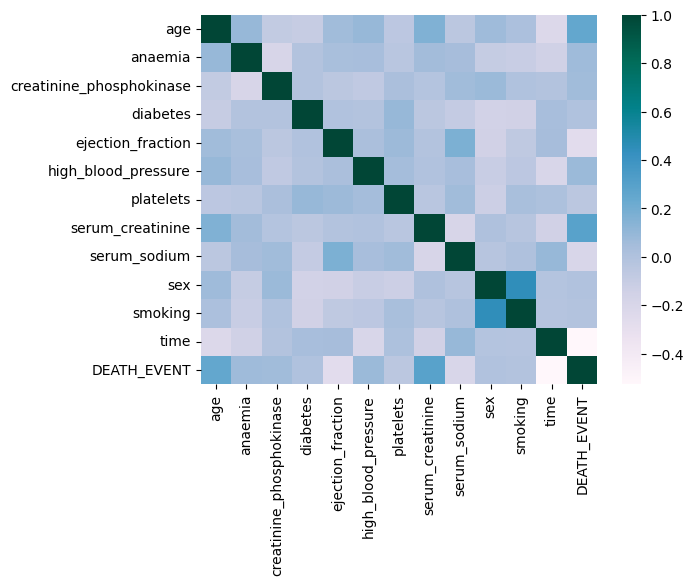

In [47]:
sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn); #Это функция из библиотеки Seaborn, которая создает тепловую карту на 
#основе переданных данных. В данном случае, она принимает матрицу корреляции, полученную на предыдущем шаге.

# cmap=plt.cm.PuBuGn: Этот параметр задает цветовую палитру для тепловой карты. 

Создает визуализацию, которая позволяет легко увидеть, какие признаки в наборе данных имеют сильную или слабую корреляцию друг с другом

Коррелирующие признаки обычно удаляются и не рассматриваются в 
процессе обучения. 

Из карты heatmap видно, что некоторые признаки коррелируют: например сильная корреляция в паре (sex, smoking). Из таких пар можно удалить один признак

In [48]:
# Удаление коррелирующих признаков

feats = ['sex', 'smoking'] # feats — это переменная, которая должна содержать список имен колонок (признаков), которые вы хотите удалить из data. 
data_uncorr = data.drop(feats, axis=1)
#axis=1 указывает, что мы хотим удалить колонки (если бы вы указали axis=0, то удалялись бы строки).
data_uncorr.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT'],
      dtype='object')

Перестраиваем heatmap без коррелирующих признаков

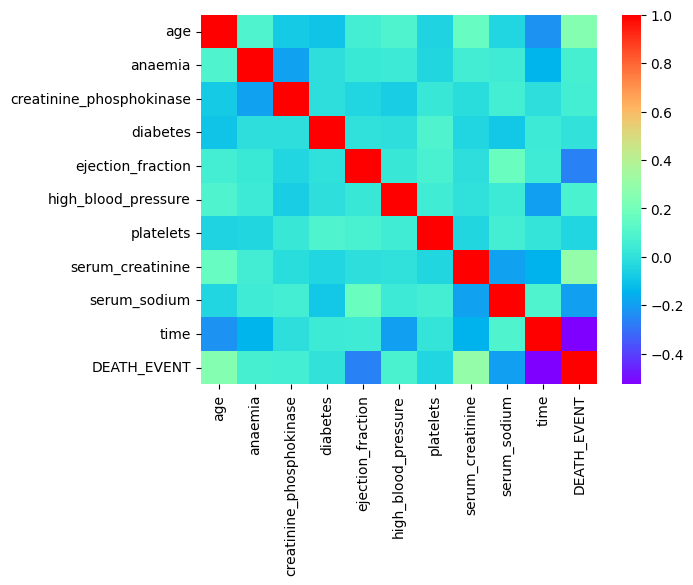

In [49]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);